# EDA (Exploratory Data Analysis, 탐색적 데이터 분석)

## EDA란
- 데이터 정보를 파악하여 문제 해결에 필요한 힌트를 분석하는 과정

## EDA의 다섯 단계

[1] 데이터 출처와 주제 이해하기
- 어디에서 생성됐는지
- 어떻게 수집됐는지
- 데이터의 이름, 구성 요소, 출처, 주제 파악하기

[2] 데이터 크기 알아보기
- 데이터의 크기에 따라서 특정 샘플링이 필요하기도 하고, 데이터 처리 방식도 달라질 수 있다.

[3] 데이터 구성 요소(피처) 살펴보기

[4] 피처 탐색하기  
- 피처 속성 탐색 ex) 평균 키 파악  
- 피처 상관 관계 탐색 ex) 몸무게와 키의 관계 파악

[5] 탐색한 데이터 시각화
- 패턴이나 인사이트 발견하기

# 예제) 치폴레 주문 데이터 분석하기

주제: 가장 인기 있는 메뉴는 무엇일까?

<u>주제에 필요한 정보 리스트 업 하기</u>
- 가장 많이 판매된 메뉴 Top 10
- 매뉴별 판매량
- 메뉴별 가격대

## 데이터 기초 정보 탐색

In [1]:
# 판다스 라이브러리 불러오기
import pandas as pd

# 데이터 가져오기
file_path = 'Desktop/python-data-analysis-master/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t') # sep='\t' 구분자가 tab # 기본 구분자는 comma(,)

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
print("shape:", chipo.shape)
print("----------------------------")
print(chipo.info())

shape: (4622, 5)
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

피처의 의미
- order_id: 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템 이름
- choice_description: 주문한 아이템의 상세 선택 옵션
- item_price: 주문한 아이템 가격

quantity와 item_price는 연속형 피처이다.
- ?? 여기서 quantity는 discrete 아닌가?

<u>피처 형태의 종류</u>
- 수치형 (numerical)
    - 연속형 (continuous): 키, 몸무게
    - 불연속형 (discrete): 나이
- 범주형 (categorical)
    - 순서가 있는 (ordinal): 학점 (순서가 있으나 수치는 아니다)
    - 순서가 없는 (nominal): 혈액형

수치형 데이터는 describe()함수로 기초 통계량을 확인해본다.

범주형 데이터는 unique()로 각 범주의 개수를 알아본다.

In [5]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환한다
chipo['order_id'] = chipo['order_id'].astype(str)

In [6]:
# 수치형 피처(여기서는 quantity)의 기초 통계량 확인
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


결과:
- 평균 주문 수량은 약 1.08개 이다.  

**인사이트:**
- **한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다**

In [7]:
# 범주형 피처의 unique 개수 확인
print("총 주문 수", chipo['order_id'].nunique())
print("총 메뉴 수", chipo['item_name'].nunique())

총 주문 수 1834
총 메뉴 수 50


## 인사이트의 발견: 탐색과 시각화하기

recall, 아까 만들어뒀던 필요한 정보 리스트
- 가장 많이 판매된 메뉴 Top 10
- 매뉴별 판매량
- 메뉴별 가격대

### [1] 가장 많이 주문한 아이템 Top 10

In [8]:
# 가장 많이 주문한 아이템 Top 10 
item_count = chipo['item_name'].value_counts()[:10]
# note: DataFrame['col']은 시리즈를 반환한다.
# note: value_counts()는 시리즈에만 적용된다.

item_count 

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [9]:
# item_count
print(item_count.index)
print()
print(item_count.values)
print()
print(item_count.dtype)

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa'],
      dtype='object')

[726 553 479 368 301 211 211 162 115 110]

int64


<u>Series란?</u>  
Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.).   
The axis labels are collectively called index.

In [10]:
# item_count.items()
print(item_count.items())
print()
print("list")
print(list(item_count.items()))


list
[('Chicken Bowl', 726), ('Chicken Burrito', 553), ('Chips and Guacamole', 479), ('Steak Burrito', 368), ('Canned Soft Drink', 301), ('Steak Bowl', 211), ('Chips', 211), ('Bottled Water', 162), ('Chicken Soft Tacos', 115), ('Chips and Fresh Tomato Salsa', 110)]


In [11]:
for idx, (val, cnt) in enumerate(item_count.items(), start=1):
    print("Top", idx, ":", val, cnt
         )
# note: enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 튜플을 만들어준다. 
# 따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 한다.

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### [2] 메뉴별 판매량

In [12]:
# 메뉴별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [13]:
# 메뉴별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

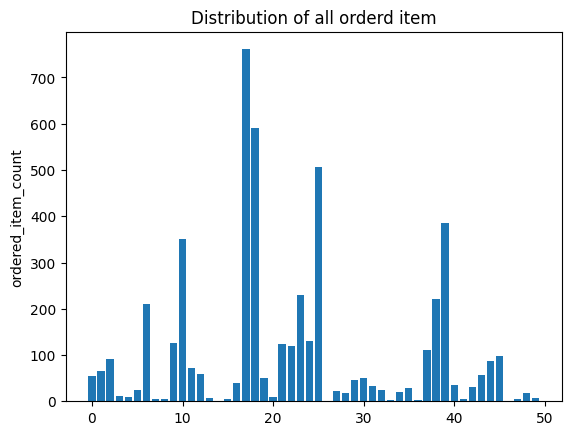

In [14]:
# 메뉴별 주문 총량 시각화
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = list(item_quantity.index)
x_pos = np.arange(len(item_name_list)) # 메뉴 50개 이름을 x축에 표현하기에는 그래프의 공간이 너무 협소해서 숫자로 대체
# itee_name_list로 굳이 안 바꿔도 된다. 50개만 나오면 됨! nunique이나 len써서 표현 가능
order_cnt = list(item_quantity.values) # 메뉴별 주문 총량

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
plt.show()

## 데이터 전처리

In [15]:
print(chipo.info())
print('-------------------')
print(chipo['item_price'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------------
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


item_price의 달러 기호를 없애고 숫자형으로 바꾸면 통계값을 사용할 수 있다.

In [16]:
# '$' 제거
# 데이터 타입 변환 object to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) 
# 0번째에 '$'가 있으니까 값을 1번째 자리부터 가져오기 (다른 방법으로 replace도 사용 가능하다)

chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받는다.  
따라서 피처 단위의 합계나 평균을 구할 수도 있고,   
우리가 정의할 새로운 함수 문자열 데이터에서 '첫 번째 문자열을 제거한 뒤 나머지 문자열을 수치형으로 바꿔주는 함수'(lambda x: float(x[1:]))를 파라미터로 입력할 수도 있다.


## 탐색적 분석: 스무고개로 개념적 탐색 분석하기

### [3] 주문당 평균 계산금액

In [17]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

**인사이트: 한 사람이 약 18달러 가량의 주문을 할 것이다.**

### [4] 한 주문에 10달러 이상 지불한 주문 번호(id)

In [18]:
# 주문별 가격
order_grouped = pd.DataFrame(chipo.groupby('order_id')['item_price'].sum())
# 주문별 가격이 10달러 이상인 주문 번호
results = order_grouped[order_grouped.item_price >= 10]
results.index.values

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

### [5] 메뉴별 가격대

In [19]:
# 메뉴를 하나만 주문한 경우 추출 (전체 주문에서 메뉴가 하나 X, 메뉴의 수량이 하나 O)
chipo_one_item = chipo[chipo.quantity == 1]
# 메뉴별 최저가 추출
price_per_item = chipo_one_item.groupby('item_name').min()
# 메뉴별 가격 내림차순 정렬
price_per_item.sort_values(by='item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [20]:
# chipo_one_item: 'quantity == 1'인 이유
chipo_one_item['item_name'].nunique()

50

chipo_one_item의 nuique가 50개 인걸로 봐서 모든 메뉴가 1개씩 주문된 기록이 있다는 전제가 있나보다.

In [21]:
# price_per_item: min()을 찾는 이유 
chipo_one_item[chipo_one_item.order_id == '1834']

,order_id,quantity,item_name,choice_description,item_price
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


이걸 보면 같은 치킨 샐러드 보울인데 가격이 다른 경우가 있다.  
옵션을 추가하면 값이 올라가는 상황인가 본데 그래서 최저가를 기본가로 보는 듯

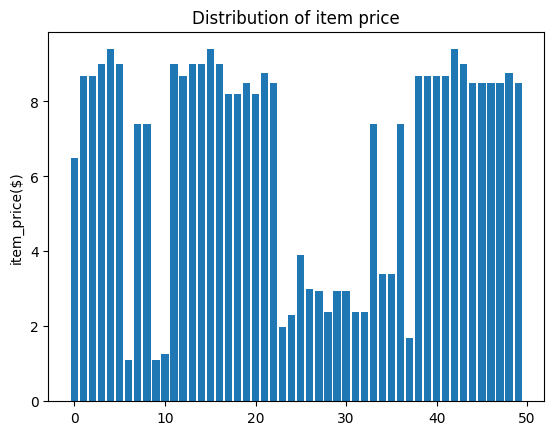

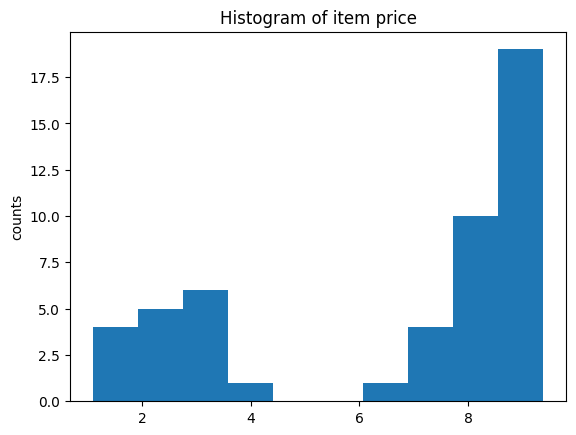

In [22]:
# 메뉴 가격 분포 그래프
item_name_list = price_per_item.index.tolist() # 전체 아이템 이름 리스트에 담기
x_pos = np.arange(len(item_name_list)) # 아이템 이름을 전부 표시할 수 없어서 숫자로 대체
item_price = price_per_item['item_price'].tolist() # y축에 들어갈 전체 메뉴별 가격 리스트에 담기

# 막대 그래프
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item_price($)')
plt.title('Distribution of item price')
plt.show()

# 히스토그램
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

**인사이트: 2-4달러, 혹은 6-8달러 정도에 아이템의 가격대가 형성되어 있음을 알 수 있다.**  
8~10달러 아닐까요

### [6] 가장 비싼 주문에서 팔린 아이템 총 개수

In [23]:
chipo.groupby('order_id')[['quantity', 'item_price']].sum().sort_values(by='item_price', ascending=False)[:1]

,quantity,item_price
order_id,,
926,23,205.25


### [7] 'Veggie Salad Bowl'의 총 주문 횟수

In [24]:
# 'Veggi Salad Bowl' 주문 추출
veg_sal = chipo[chipo.item_name == 'Veggie Salad Bowl']
# 한 주문 내에서 중복 집계된 메뉴 제거
veg_sal = veg_sal.drop_duplicates(['item_name', 'order_id'])
# 총 주문 횟수
len(veg_sal)

18

### [8] 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl'메뉴에 대한 총 주문 수량

In [25]:
len(chipo[(chipo.item_name == 'Chicken Bowl') & (chipo.quantity >= 2)])

33

## 정리

- 가장 많이 주문된 아이템: Chicken Bowl
- 주문된 전체 아이템 종류: 50개
- 메뉴별 총 주문 수: 50개 중 상위 8개 정도의 아이템에 주문이 집중되었다.
- 주문당 평균 계산 금액: 평균은 약 18달러이고 표준편차는 11로 나타났다. 25-75%에 해당하는 구간이 12-21달러이며 최대값이 200달러를 넘는 것으로 보아, 소수의 주문을 제외하면 대부분 평균 근처의 계산 금액을 보인다. 표준편차 11은 예외 처리를 통한 보정값을 계산할 여지가 있다.
- 각 아이템의 대략적인 가격: 메뉴 가격은 대부분 2-4달러 혹은 6-8달러 정도이다.

# 예제) 국가별 음주 데이터 분석하기

주제: 대한민국은 얼마나 술을 먹는 나라일까?

## 데이터 기초 정보 탐색

In [26]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 가져오기
file_path2 = 'Desktop/python-data-analysis-master/data/drinks.csv'
drinks = pd.read_csv(file_path2)

print(drinks.info())
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [27]:
# 피처의 수치적 정보 확인
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 인사이트의 발견: 탐색과 시각화하기

**상관분석**
- 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것
- 공분산의 개념을 포함한다
- <u>공분산</u>: 2개의 확률 변수에 대한 상관 정도. 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것.
- 하지만 공분산만으로 두 확률 변수의 상관 관계를 구한다면 두 변수의 <u>단위 크기</u>에 영향을 받을 수 있다.
- 따라서 이를 -1과 1사이의 값으로 변환하고 이를 '상관 계수'라고 한다.
- 만약 상관 계수가 1에 가깝다면 서로 강한 양의 상관 관계가 있는 것이고, -1에 가깝다면 음의 상관 관계가 있는 것이다.

상관 관계를 살펴볼 대상은  
beer, wine, spirit_servings, total_litres_of_pure_alcohol 4개의 피처이다.  
이 피처는 술의 종류만 다를 뿐, 결국에는 비슷한 의미를 가지기 때문이다.

In [ ]:
# [1] 맥주와 와인 소비량의 상관 관계
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
# pearson: 상관 계수를 구하는 계산 방법 중 하나. 가장 널리 쓰인다.
print(corr)

두 피처 간의 상관 계수: 0.52

In [29]:
# [2] 모든 피처들을 각각 1대 1로 비교하기
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr4 = drinks[cols].corr(method='pearson')
print(corr4)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


파이썬 라이브러리 seaborn을 사용해서 heatmap과 pairplot으로 시각화를 할 수 있다.

In [30]:
# seaborn, matplotlib 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

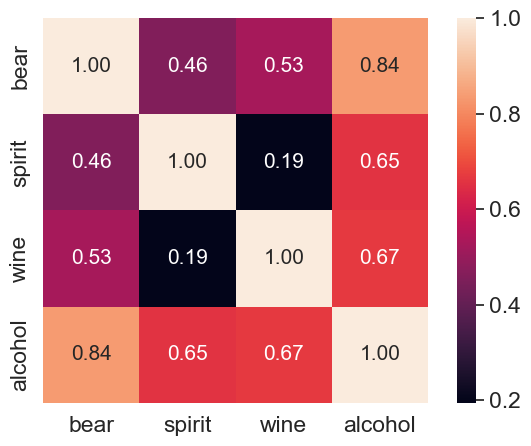

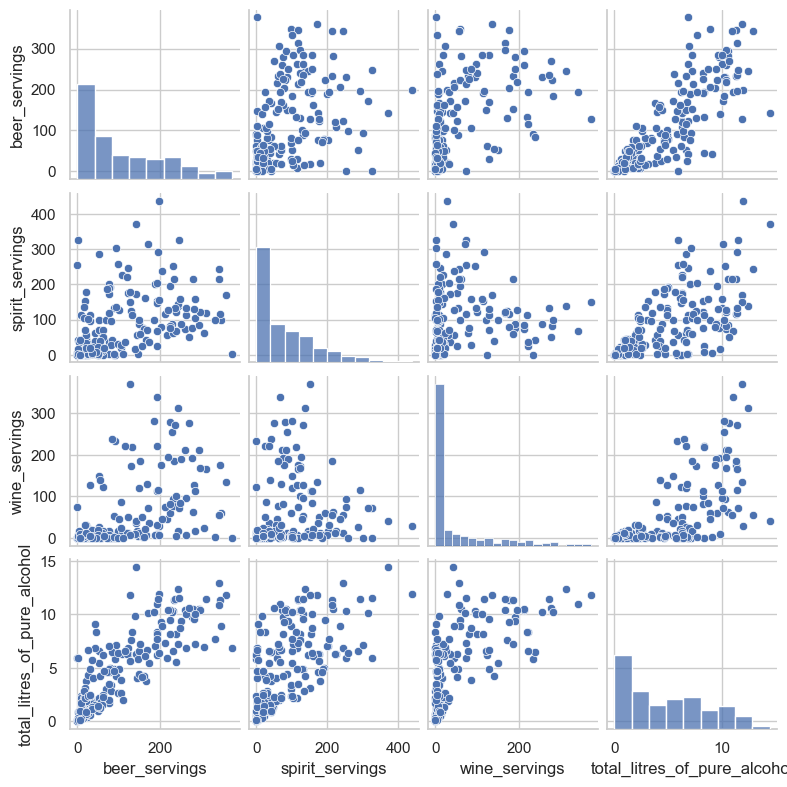

In [31]:
# heatmap
cols_name = ['bear', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5) # cols_name 폰트 크기
hm = sns.heatmap(corr4.values, # rectangular data set
                cbar = True, # Whether to draw a colorbar.
                annot = True, # (annotate) 각 cell에 값 표시
                square = True, # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                fmt = '.2f', # 소수점 둘째자리 까지 표시
                annot_kws = {'size': 15},# (keyword arguments) annote 폰트 크기
                yticklabels = cols_name, # y축 라벨
                xticklabels = cols_name) # x축 라벨

plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

# pairplot 산점도 그래프 
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[cols], height=2)
plt.show()

## 데이터 전처리

In [32]:
# 결측 데이터 처리
# 현재 continent에만 존재하는 결츨치를 'Others', 줄여서 'OT'로 새롭게 정의
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


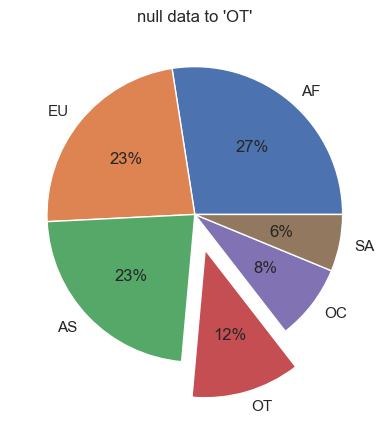

In [33]:
# OT가 차지하는 비율을 파이차트로 시각화
labels = drinks['continent'].value_counts().index.tolist() # labels에 대륙 이름을 리스트로 저장
fracs1 = drinks['continent'].value_counts().values.tolist() # fracs1에 대륙별 count된 수를 리스트로 저장
explode = (0, 0, 0, 0.25, 0, 0) # 파이에서 분리할 정도를 나타낸다. 여기서 0.25의 위치가 fracs1에서 OT 위치와 같다.

plt.pie(fracs1, 
        explode=explode, 
        labels=labels, 
        autopct='%.0f%%') # 파이 조각별 비율 표시
plt.title('null data to \'OT\'')
plt.show()

In [34]:
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [35]:
fracs1

[53, 45, 44, 23, 16, 12]

## 탐색적 분석: 스무고개로 개념적 탐색 분석하기 

### 대륙별 spirit_servings의 통계적 정보는 어느 정도일까?

**agg()함수**를 사용하여 대륙 단위로 분석을 수행할 수 있다.
agg()함수는 apply()함수와 거의 동일한 기능을 하지만,   
apply()에 들어가는 함수 파라미터를 **병렬**로 설정하여 **그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수**이다.

In [36]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 계산
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


OT를 제외하고 유럽이 제일 많이 spirit을 마신다.

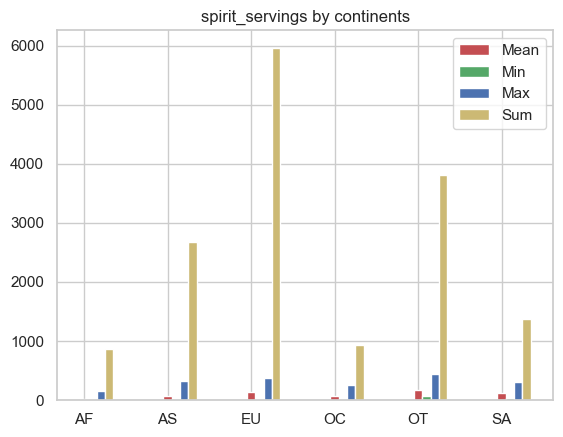

In [37]:
# 대륙별 spirit_servings 통계 정보 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist()) # x축 index를 대륙명으로 변경
plt.legend()
plt.title('spirit_servings by continents')
plt.show()

### 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?

In [38]:
# 전체 알코올 섭취 평균
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
# 대륙별 알코올 섭취 평균
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() 
# 전체 평균보다 많은 알코올을 섭취하는 대륙
continent_over_mean = continent_mean[continent_mean > total_mean]
print(total_mean)
print(continent_over_mean)

4.717098445595855
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


OT를 제외하고, 유럽, 남미의 알콜 섭취량이 전체 평균보다 높다.

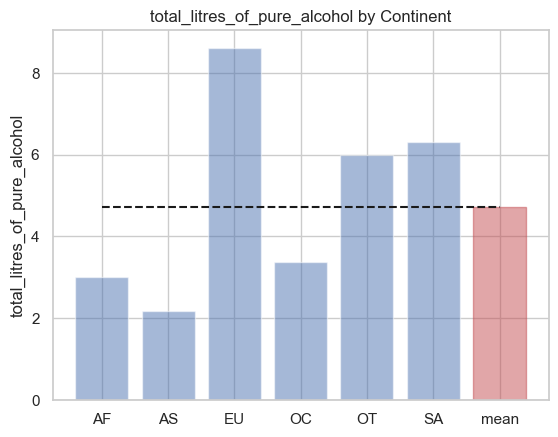

In [39]:
# 대륙별 알코올 섭취량 시각화
continents = continent_mean.index.tolist() # 대륙 이름 리스트
continents.append('mean') # 대륙 이름 리스트에 'mean' 추가
x_pos = np.arange(len(continents)) # x축 index
alcohol = continent_mean.values.tolist() # 대륙별 알코올 섭취량 리스트
alcohol.append(total_mean) # 대륙별 알코올 섭취량 리스트에 전체 평균 섭취량 추가

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5) # alpha: 막대기 선명도
bar_list[len(continents) - 1].set_color('r') # 마지막 막대기 r색으로 변경
plt.plot([0., 6], [total_mean, total_mean], "k--") # k색 --점선 추가 # plot([x시작점, x끝점], [y시작점, y끝점], 스타일)
plt.xticks(x_pos, continents) # x축 index를 대륙명으로 변경

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

### 평균 beer_servings가 가장 높은 대륙은 어디일까?

In [40]:
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
# idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환한다.
print(beer_continent)

EU


맥주를 가장 좋아하는 대륙은 유럽이다.

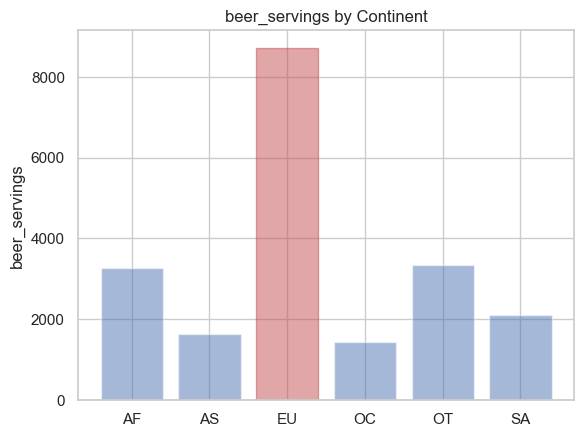

In [41]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum() # 대륙별 맥주 소비량
continents = beer_group.index.tolist() # 대륙 이름 리스트
y_pos = np.arange(len(continents)) # x축 index
alcohol = beer_group.tolist() # 대륙별 맥주 소비량 리스트

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[(continents.index("EU"))].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

### 대륙별 평균 wine_servings 피처 생성

In [97]:
wine_continent = drinks.groupby('continent')['wine_servings'].mean() # 대륙별 와인 평균 소비량
wine_avg = wine_continent.to_frame().reset_index() # 타입 변경 series -> data frame
wine_avg = wine_avg.rename(columns=['wine_servings':'wine_servings_cont_avg']) # 컬럼명 변경 (columns=[old:new])
drinks = pd.merge(drinks, wine_avg, on='continent', how='outer') # 기존 drinks와 wine_avg 병합

# 위와 같은 방법의 코드
drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)
# np.mean <-> 'mean'

# 결과 출력
drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
23,Brazil,SA,62.416667
92,Laos,AS,9.068182
0,Afghanistan,AS,9.068182
60,Finland,EU,142.222222
165,Sweden,EU,142.222222


### 국가별 total_servings 피처 생성 (!= 대륙별)

In [101]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
5,Antigua & Barbuda,102,45,128,275
102,Malaysia,13,0,4,17
91,Kyrgyzstan,31,6,97,134
160,Spain,284,112,157,553
21,Bosnia-Herzegovina,76,8,173,257


### 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit를 가장 많이 마시는 국가

In [123]:
# 전체 평균 알코올
alcohol_mean = drinks['total_litres_of_pure_alcohol'].mean()

# 대륙별 평균 알코올
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 전체 평균보다 적은 알코올을 섭취하는 대륙 리스트
continent_under_mean = continent_mean[continent_mean <= total_mean].index.to_list() 

# 리스트에 해당하는 drinks 필터링
df_continent_under_mean = drinks.loc[drinks['continent'].isin(continent_under_mean)]
df_continent_under_mean

# 그 중 spirit을 가장 많이 마시는 국가 필터링
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
    # idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환한다.
print(most_spirit_under_mean)
print()
print(most_spirit_under_mean['country'])

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
total_servings                                 646
alcohol_rate                              0.017802
wine_servings_cont_avg                    9.068182
Name: 141, dtype: object

Russian Federation


### 술 소비량 대비 알코올 비율

In [133]:
# 술 소비량 대비 알코올 비율에 대한 칼럼을 만들어서 병합한다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0) # 결측값은 0으로 대체

## 술 소비량 대비 알코올 비율 : 전체에서 한국 순위

# 술 소비량 대비 알코올 비율 랭킹 순으로 정렬
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False) # rank() 함수, 내림차순 정렬
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor) # np.foor: 내림함수 (default: 1의 자리 수 까지)

# 한국 순위
drinks.loc[drinks['country'] == 'South Korea']['alcohol_rate_rank']

138    15.0
Name: alcohol_rate_rank, dtype: float64

한국 순위: 15위

### 대륙별 술 소비량 대비 알코올 비율

In [152]:
# 대륙에 따른 컬럼별 총합
continent_sum = drinks.groupby('continent').sum(numeric_only = True)

# 대륙별 총 술 소비량 대비 총 알코올 비율
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / continent_sum['total_servings']
continent_sum = continent_sum.reset_index() # 인덱스 초기화 (대륙명 to num)
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']] # 'continent'와 'alcohol_rate_continent'만 남기기

# 대륙별 알코올 비율을 drinks에 병합
drinks = pd.merge(drinks, continent_sum, on='continent', how='outer')

# 결과 출력
drinks[['country', 'continent', 'alcohol_rate_continent']].sample(5)

,country,continent,alcohol_rate_continent
180,Kiribati,OC,0.018401
43,Yemen,AS,0.020293
87,Ukraine,EU,0.018392
146,Canada,OT,0.017860
170,Ecuador,SA,0.017909


## 통계적 분석: 분석 대상 간의 통계적 차이 검정하기

지금까지는 두 피처 간의 상관성을 계산하거나 혹은 그룹 단위로 나누어 수치 정보를 살펴보는 방식의 데이터 분석을 알아보았습니다.  
인사이트를 발견하는 데 있어서 매우 유용한 방법입니다.  
하지만 이는 분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 **타당성을 증명하기에는 한계가 있습니다.**  
따라서 분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요합니다.  
그 중 가장 기본적인 방법인 **t-test**를 통해 분석 대상 간에 통계적 차이를 검정하는 방법을 알아봅시다.

**t-test**
- 두 집단 간 평균의 차이에 대한 검정 방법
- **모집단의 평균** 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법
- 단, 검정 대상인 두 집단의 **데이터의 개수가 비슷**하면서 두 데이터가 **정규 분포**를 보이는 경우에 신뢰도가 높은 검정 방식

파이썬에서는 **scipy**라는 라이브러리를 활용해서 t-test 검정을 할 수 있다.

In [43]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정하기
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats

# ttest_ind() 함수에 두 집단의 시리즈 데이터를 넣는 것으로 t-test 검정 결과를 확인할 수 있다.
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) # (default)eqaul_var=True
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                    europe['beer_servings'], equal_var=False)
# equal_var: t-test의 두 가지 방법 중에 하나를 선택하는 것
# True는 두 집단의 분산이 같은 경우, False는 분산이 같지 않은 경우를 가정한다.

print("The t-statistic and p-value assuming equal variance is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value NOT assuming equal variance is %.3f and %.3f." % tTestResultDiffVar)

The t-statistic and p-value assuming equal variance is -7.268 and 0.000.
The t-statistic and p-value NOT assuming equal variance is -7.144 and 0.000.


**t-statistic**: t-test의 검정 통계랑. 함께 출력되는 p-value와 연관 지어 해석한다.  
**p-value**: 가설이 얼마나 믿을만한지를 나타내는 지표. 데이터를 새로 샘플링했을 때 **귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률** 

만약 p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 된다.  
보통 그 기준은 **0.05나 0.01을 기준**으로 하며, 이를 p-value(유의확률)이라고 한다.  

**귀무 가설**: 처음부터 버릴 것을 예상하는 가설. 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설  
**대립 가설**: 귀무 가설의 반대 개념. 귀무 가설이 거짓인 경우에 대안적으로 참이 되는 가설  

위 결과에서 등분산을 가정한 경우와 가정하지 않은 경우 모두 p-value가 0.000 이하로 나타났다.  
t-test의 귀무 가설은 '두 집단의 평균이 같다'이고 이 귀무 가설은 기각되었다.  
따라서 **'아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의미하다**는 결론을 내릴 수 있다.  
이는 대립 가설인 '두 집단의 평균이 다르다'를 채택한 것이다.  

하지만 두 집단의 데이터는 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정이라고 보기는 어렵다.  
만약 통계적 분석을 하기에 좋은 조건인 경우라면 이러한 방법을 사용할 수 있다는 것만 알아두자.  


다시 주제로 돌아가서, '대한민국은 얼마나 술을 독하게 마시는 나라일까?'에 대해 탐색해보자.

In [44]:
# total_servings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0) # 결측치 0으로 대체

# 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0) # alcohol_rate 기준 내림차순 정렬
country_with_rank.head(5) # 술을 독하게 마시는 상위 5개국 추출


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


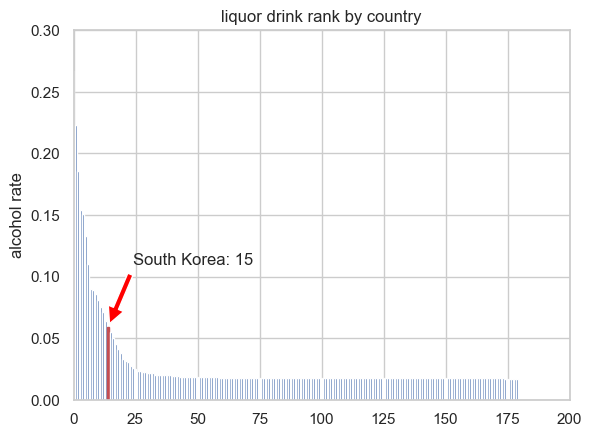

In [75]:
# 국가별 순위 정보 시각화
country_list = country_with_rank['country'].tolist() # 나라 이름 리스트 (순위별로 나열되어 있다)
x_pos = np.arange(len(country_list)) # x축 index
rank = country_with_rank['alcohol_rate'].tolist() # 각 나라 순위 리스트

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3]) # [x시작, x끝, y시작, y끝]

korea_rank = country_list.index("South Korea") # country_list가 랭킹순으로 나열되어 있어서 인덱스가 rank와 같다.
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

# 그래프에 주석 달기
plt.annotate('South Korea: ' + str(korea_rank + 1),
             xy=(korea_rank, korea_alc_rate), # 화살표가 가르키는 지점
             xytext=(korea_rank + 10, korea_alc_rate + 0.05), # 주석 좌표
             arrowprops=dict(facecolor='red', shrink=0.05)) # 화살표
plt.show()

## 정리

- 대부분의 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높다. 또한 대부분의 국가에서는 맥주가 가장 많이 소비되는 술이라는 해석도 가능하다.
- 유럽이 가장 맥주 소비량이 높다.대륙별로 상이한 차이가 있다.
- 술 소비량 대비 알코올 비율이라는 새로운 피처로부터 술을 독하게 마시는 정도의 국가별 차이를 관찰할 수 있다.
- t-test 분석 결과, 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미한 차이를 보인다. (단, 이 예제는 그룹간의 데이터 크기가 매우 다르고, 정규분포를 띤다는 가정을 할 수 없기 때문에 신뢰할 만한 정보라고 할 수 없다.)